In [813]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\JSK\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1


In [814]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../features/features-richer.csv")

In [816]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,label
0,-113.619385,121.553017,-19.151058,42.345768,-6.371168,18.613033,-13.692060,15.339378,-12.283618,10.973776,...,0.069219,0.090203,0.118815,0.122660,0.037153,0.041214,123.046875,0.130192,0.053201,blues
1,-207.581512,123.997147,8.939115,35.870758,2.919971,21.518787,-8.555368,23.355938,-10.101037,11.906445,...,0.072047,0.103942,0.118212,0.126042,0.051282,0.053711,67.999589,0.095892,0.048724,blues
2,-90.776344,140.448608,-29.100559,31.687340,-13.975971,25.741682,-13.644712,11.623112,-11.775921,9.700466,...,0.084174,0.077788,0.132330,0.126360,0.053994,0.044900,161.499023,0.175494,0.052465,blues
3,-199.462006,150.094727,5.649167,26.870144,1.755441,14.236880,-4.828873,9.297849,-0.753142,8.147393,...,0.142670,0.114296,0.147285,0.217820,0.094567,0.058704,63.024009,0.141139,0.079623,blues
4,-160.291855,126.195770,-35.602501,22.151169,-32.487640,10.862022,-23.357162,0.500523,-11.804770,1.203877,...,0.076627,0.098397,0.120686,0.130693,0.043381,0.042487,135.999178,0.091540,0.048011,blues


In [817]:
X = df.drop(labels=['label'], axis=1)
y = df['label']

In [818]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify = y)

In [819]:
X_train.shape[1]

135

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
sc = StandardScaler()

# Build pipeline
preprocess_pipeline = Pipeline([
    ('selector', SelectFromModel(estimator=rf, prefit=True, threshold='mean')),
    ('scaler', sc),
])

# Transform data
X_train = preprocess_pipeline.fit_transform(X_train, y_train)
X_test = preprocess_pipeline.transform(X_test)

# # Save the pipeline
# import joblib
# joblib.dump(preprocess_pipeline, '../models/preprocessing_pipeline.pkl')

In [821]:
X_train.shape

(799, 46)

In [822]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

       blues       0.84      0.80      0.82        20
   classical       0.86      0.95      0.90        20
     country       0.62      0.80      0.70        20
       disco       0.72      0.65      0.68        20
      hiphop       0.70      0.95      0.81        20
        jazz       0.90      0.90      0.90        20
       metal       0.90      0.95      0.93        20
         pop       0.81      0.65      0.72        20
      reggae       0.71      0.60      0.65        20
        rock       0.71      0.50      0.59        20

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.77       200



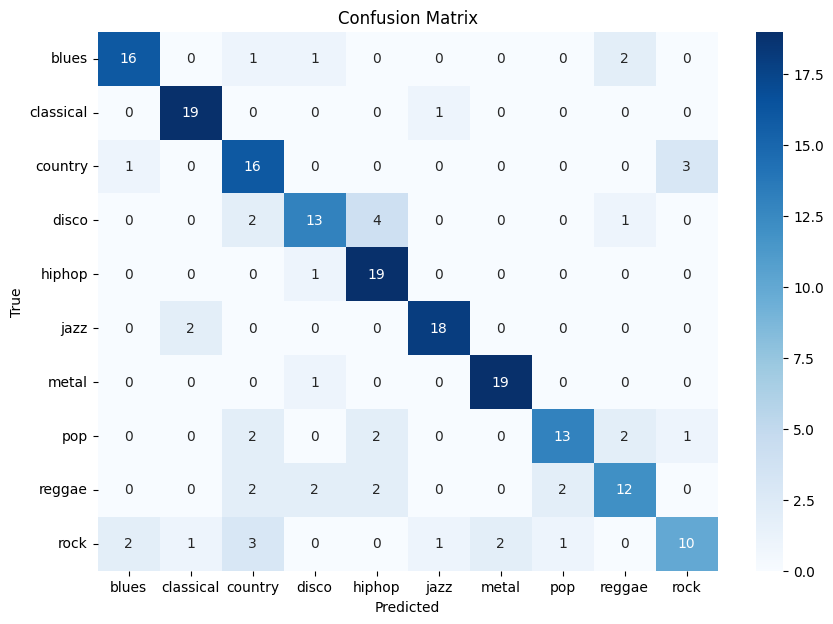

In [823]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


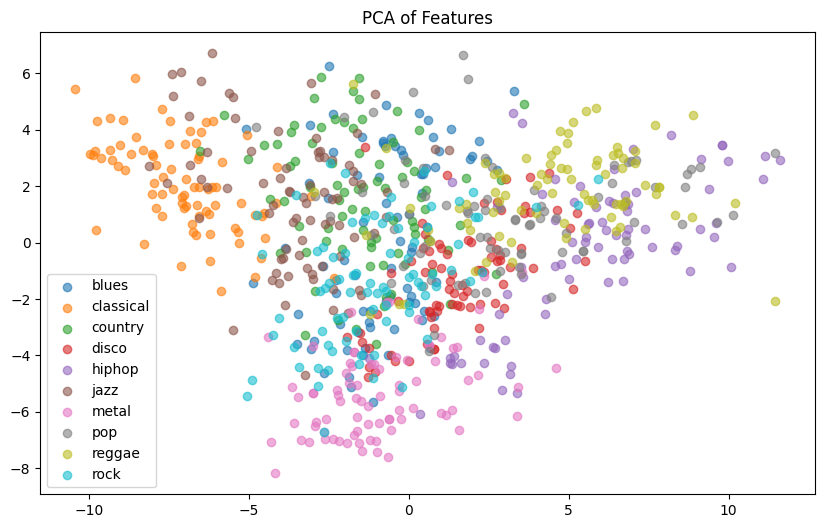

In [824]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10,6))
for label in np.unique(y_train):
    idx = y_train == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=label, alpha=0.6)
plt.legend()
plt.title("PCA of Features")
plt.show()

              precision    recall  f1-score   support

       blues       0.89      0.80      0.84        20
   classical       0.95      1.00      0.98        20
     country       0.68      0.85      0.76        20
       disco       0.58      0.55      0.56        20
      hiphop       0.75      0.90      0.82        20
        jazz       0.95      1.00      0.98        20
       metal       0.94      0.85      0.89        20
         pop       0.89      0.80      0.84        20
      reggae       0.75      0.60      0.67        20
        rock       0.70      0.70      0.70        20

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



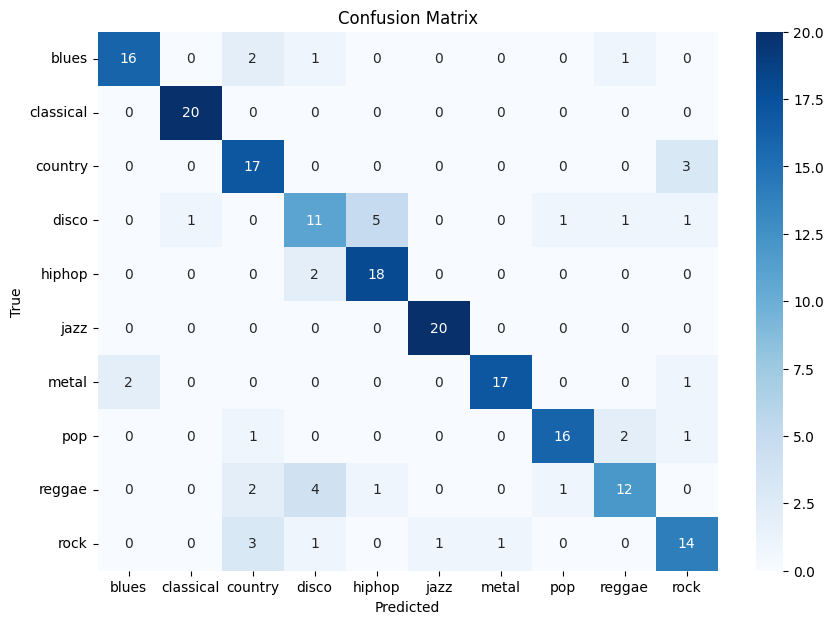

In [825]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

num_classes = len(le.classes_)
input_dim = X_train.shape[1]
# joblib.dump(le, '../models/label_encoder.pkl')

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [770]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=32,
    verbose=1
)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.1248 - loss: 3.4312 - val_accuracy: 0.3400 - val_loss: 2.6271
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2595 - loss: 2.9003 - val_accuracy: 0.4650 - val_loss: 2.3462
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3477 - loss: 2.5746 - val_accuracy: 0.5100 - val_loss: 2.1867
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3816 - loss: 2.4997 - val_accuracy: 0.6050 - val_loss: 2.0725
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4028 - loss: 2.3946 - val_accuracy: 0.6350 - val_loss: 1.9847
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4251 - loss: 2.3059 - val_accuracy: 0.6450 - val_loss: 1.9020
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4940 - loss: 2.1240 - val_accuracy: 0.6750 - val_loss: 1.8417
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5346 - loss: 2.0224 - val_accuracy: 0.6900 - 

In [771]:
# Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

# Classification Report
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print(classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))


Test Accuracy: 85.00%
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.95      1.00      0.98        20
           2       0.76      0.80      0.78        20
           3       0.73      0.80      0.76        20
           4       0.82      0.90      0.86        20
           5       0.95      1.00      0.98        20
           6       0.95      0.95      0.95        20
           7       0.89      0.80      0.84        20
           8       0.88      0.75      0.81        20
           9       0.68      0.65      0.67        20

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



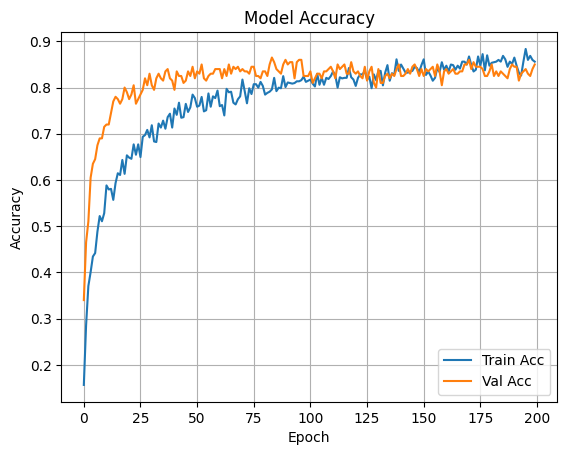

In [772]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# model.save("../models/genre_classifier_model.keras")

## Saved Model metrics

Test Accuracy: 85.00%
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.95      1.00      0.98        20
           2       0.76      0.80      0.78        20
           3       0.73      0.80      0.76        20
           4       0.82      0.90      0.86        20
           5       0.95      1.00      0.98        20
           6       0.95      0.95      0.95        20
           7       0.89      0.80      0.84        20
           8       0.88      0.75      0.81        20
           9       0.68      0.65      0.67        20

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200
